In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Regression/HousingRegressionExample/housing_data.csv')

# Display the first five rows
print(df.head())

   Size (sqft)  Bedrooms  Bathrooms  Location_Score  Age   Price
0         3674         4          2               7   16  241987
1         1360         4          3               9   19  174387
2         1794         3          3               7   23  142212
3         1630         2          2               5    4  129842
4         1595         4          3              10   33  147966


In [8]:
# Check for missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())

Size (sqft)       0
Bedrooms          0
Bathrooms         0
Location_Score    0
Age               0
Price             0
dtype: int64
       Size (sqft)    Bedrooms   Bathrooms  Location_Score         Age  \
count   200.000000  200.000000  200.000000      200.000000  200.000000   
mean   2333.775000    2.780000    1.895000        5.385000   23.720000   
std     992.421831    1.393308    0.816891        2.973379   14.943162   
min     521.000000    1.000000    1.000000        1.000000    0.000000   
25%    1519.000000    1.000000    1.000000        3.000000   10.000000   
50%    2372.000000    3.000000    2.000000        5.000000   23.500000   
75%    3229.500000    4.000000    3.000000        8.000000   36.250000   
max    3999.000000    5.000000    3.000000       10.000000   49.000000   

               Price  
count     200.000000  
mean   151889.385000  
std     64173.138589  
min    -17698.000000  
25%    101316.000000  
50%    155076.000000  
75%    201064.250000  
max    288132.00

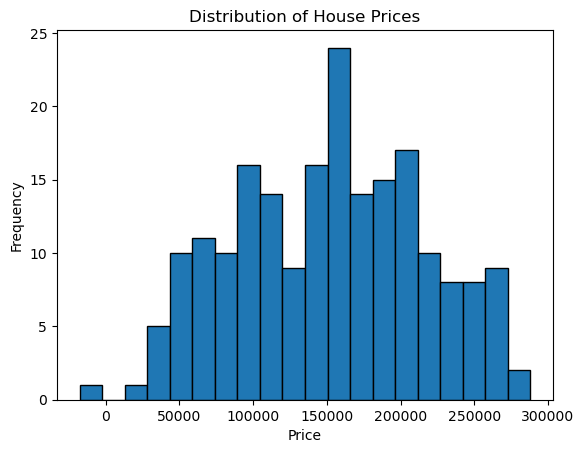

In [9]:
# Plot a histogram of house prices
plt.hist(df['Price'], bins=20, edgecolor='k')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


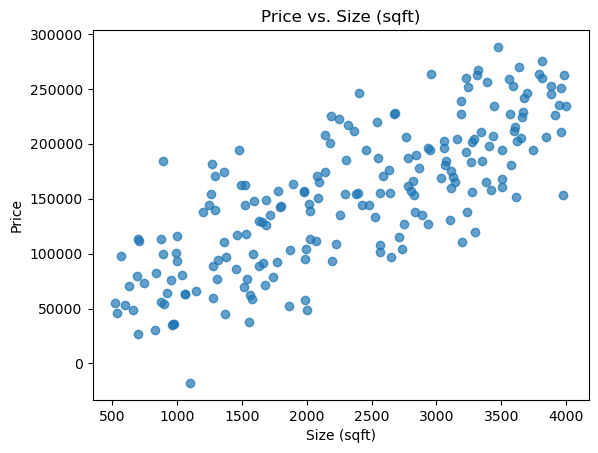

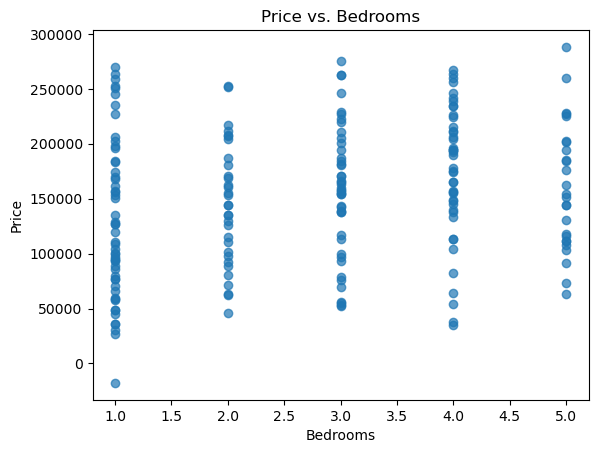

In [10]:
# Scatter plots
plt.scatter(df['Size (sqft)'], df['Price'], alpha=0.7)
plt.title('Price vs. Size (sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.show()

plt.scatter(df['Bedrooms'], df['Price'], alpha=0.7)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

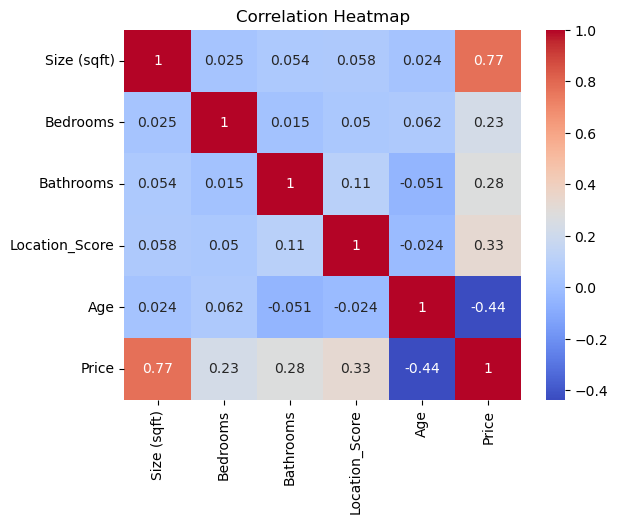

In [11]:
# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Features and target variable
X = df[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Location_Score', 'Age']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (160, 5)
Test set size: (40, 5)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Simple linear regression with Size (sqft)
X_simple = X_train[['Size (sqft)']]
X_test_simple = X_test[['Size (sqft)']]

model_simple = LinearRegression()
model_simple.fit(X_simple, y_train)

# Predictions
y_pred_simple = model_simple.predict(X_test_simple)

In [15]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred_simple)
mse = mean_squared_error(y_test, y_pred_simple)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 24933.51
MSE: 924688579.65
RMSE: 30408.69


In [16]:
# Multiple linear regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predictions
y_pred_multiple = model_multiple.predict(X_test)


In [17]:
# Evaluation
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"RMSE: {rmse_multiple:.2f}")

MAE: 10807.14
MSE: 149869885.96
RMSE: 12242.14


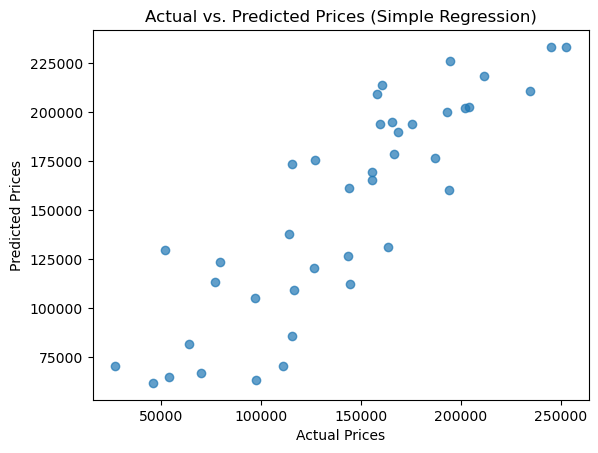

In [18]:
# Simple regression
plt.scatter(y_test, y_pred_simple, alpha=0.7)
plt.title('Actual vs. Predicted Prices (Simple Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

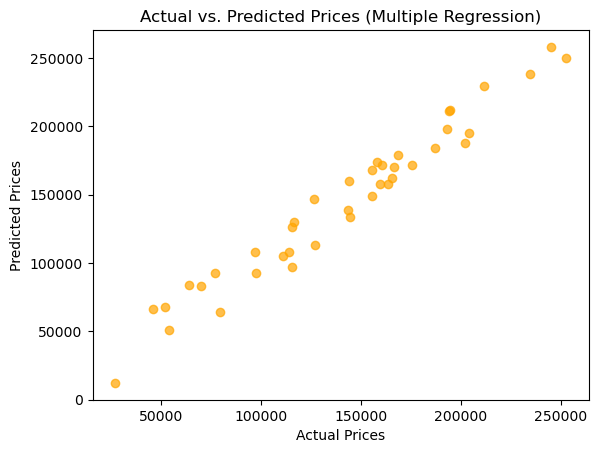

In [19]:
# Multiple regression
plt.scatter(y_test, y_pred_multiple, alpha=0.7, color='orange')
plt.title('Actual vs. Predicted Prices (Multiple Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()